# 🤖 NewsBot Intelligence System
## ITAI 2373 - Mid-Term Group Project Template

**Team Members:** Andres Daza and Taki Boubekri
**Date:** November 1, 2025
**GitHub Repository:** https://github.com/AndresDazaTech/ITAI-2373-Project

---

## 🎯 Project Overview

Welcome to your NewsBot Intelligence System! This notebook will guide you through building a comprehensive NLP system that:

- 📰 **Processes** news articles with advanced text cleaning
- 🏷️ **Classifies** articles into categories (Politics, Sports, Technology, Business, Entertainment, Health)
- 🔍 **Extracts** named entities (people, organizations, locations, dates, money)
- 😊 **Analyzes** sentiment and emotional tone
- 📊 **Generates** insights for business intelligence

### 📚 Module Integration Checklist
- [ ] **Module 1:** NLP applications and real-world context
- [ ] **Module 2:** Text preprocessing pipeline
- [ ] **Module 3:** TF-IDF feature extraction
- [ ] **Module 4:** POS tagging analysis
- [ ] **Module 5:** Syntax parsing and semantic analysis
- [ ] **Module 6:** Sentiment and emotion analysis
- [ ] **Module 7:** Text classification system
- [ ] **Module 8:** Named Entity Recognition

---

## 📦 Setup and Installation

Let's start by installing and importing all the libraries we'll need for our NewsBot system.

In [24]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [25]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

**💡 Discussion Question:** What other real-world applications can you think of for this type of system? Consider different industries and use cases.

In [26]:
# Load your dataset
# 💡 TIP: If using the provided dataset, upload it to Colab first
# 💡 TIP: You can also use sample datasets like BBC News or 20 Newsgroups

# Option 1: Load provided dataset
train_df = pd.read_csv('BBC News Train.csv')
test_df = pd.read_csv('BBC News Test.csv')
Sample_df = pd.read_csv('BBC News Sample Solution.csv')


print("Train DataFrame head:")
print(f"Shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
display(train_df.head())

print("\nTest DataFrame head:")
print(f"Shape: {test_df.shape}")
print(f"Columns: {test_df.columns.tolist()}")
display(test_df.head())

print("\nSample DataFrame head:")
print(f"Shape: {Sample_df.shape}")
print(f"Columns: {Sample_df.columns.tolist()}")
display(Sample_df.head())




Train DataFrame head:
Shape: (1490, 3)
Columns: ['ArticleId', 'Text', 'Category']


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business



Test DataFrame head:
Shape: (735, 2)
Columns: ['ArticleId', 'Text']


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...



Sample DataFrame head:
Shape: (735, 2)
Columns: ['ArticleId', 'Category']


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


📊 DATASET OVERVIEW
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']
Text range: $1m payoff for former shell boss shell is to pay $1m (£522 000) to the ex-finance chief who stepped down from her post in april 2004 after the firm over-stated its reserves.  judy boynton finally left the firm on 31 december  having spent the intervening time as a special advisor to chief executive jeroen van der veer. in january 2004  shell told shocked investors that its reserves were 20% smaller than previously thought. shell said the pay-off was in line with ms boynton s contract. she was leaving  by mutual agreement to pursue other career opportunities   the firm said in a statement. the severance package means she keeps long-term share options  but fails to collect on a 2003 incentive plan since the firm has failed to meet the targets included in it.  the revelation that shell had inflated its reserves led to the resignation of its chairm

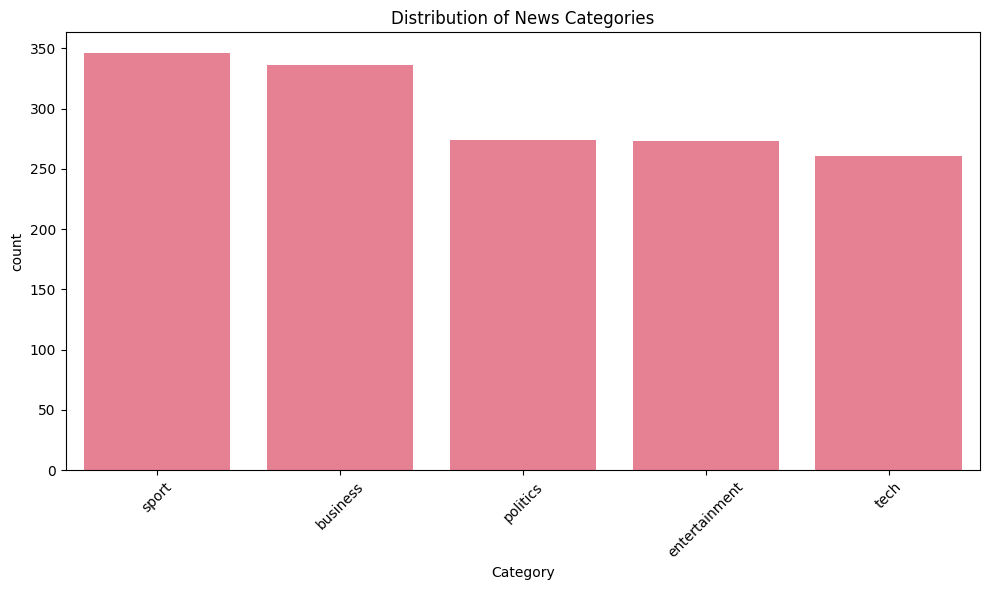

In [27]:
# Basic dataset exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Total articles: {len(train_df)}")
print(f"Unique categories: {train_df['Category'].nunique()}")
print(f"Categories: {train_df['Category'].unique().tolist()}")
print(f"Text range: {train_df['Text'].min()} to {train_df['Text'].max()}")
print(f"Unique sources: {train_df['ArticleId'].nunique()}")

print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = train_df['Category'].value_counts()
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Category', order=category_counts.index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Add your own exploratory analysis here
# - Check for missing values
# - Analyze text length distribution
# - Examine source distribution
# - Look for any data quality issues

## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [28]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(Text):
    """
    Comprehensive text cleaning function

    💡 TIP: This function should handle:
    - HTML tags and entities
    - URLs and email addresses
    - Special characters and numbers
    - Extra whitespace
    """
    if pd.isna(Text):
        return ""

    # Convert to string and lowercase
    Text = str(Text).lower()

    # 🚀 YOUR CODE HERE: Implement text cleaning
    # Remove HTML tags
    Text = re.sub(r'<[^>]+>', '', Text)

    # Remove URLs
    Text = re.sub(r'http\S+|www\S+|https\S+', '', Text, flags=re.MULTILINE)

    # Remove email addresses
    Text = re.sub(r'\S+@\S+', '', Text)

    # Remove special characters and digits (keep only letters and spaces)
    Text = re.sub(r'[^a-zA-Z\s]', '', Text)

    # Remove extra whitespace
    Text = re.sub(r'\s+', ' ', Text).strip()

    return Text

def preprocess_text(Text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline

    💡 TIP: This function should:
    - Clean the text
    - Tokenize into words
    - Remove stop words (optional)
    - Lemmatize words (optional)
    - Return processed text
    """
    # Clean text
    Text = clean_text(Text)

    if not Text:
        return ""

    # 🚀 YOUR CODE HERE: Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(Text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews"
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews

Cleaned text:
apple inc announced record quarterly earnings today visit for more info technews

Fully preprocessed text:
apple inc announced record quarterly earnings today visit info technews


In [29]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new columns for processed text
train_df['title_clean'] = train_df['Text'].apply(clean_text)
train_df['category_clean'] = train_df['Category'].apply(clean_text)
train_df['text_processed'] = train_df['Text'].apply(preprocess_text)
train_df['category_processed'] = train_df['Category'].apply(preprocess_text)

# Combine title and content for full article analysis
train_df['full_text'] = train_df['Text'] + ' ' + train_df['Category']
train_df['full_text_processed'] = train_df['full_text'].apply(preprocess_text)

print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(train_df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {train_df.iloc[i]['full_text'][:100]}...")
    print(f"Processed: {train_df.iloc[i]['full_text_processed'][:100]}...")

# 💡 STUDENT TASK: Analyze the preprocessing results
# - Calculate average text length before and after
# - Count unique words before and after
# - Identify the most common words after preprocessing

🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...


## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [30]:
# Create TF-IDF vectorizer
# 💡 TIP: Experiment with different parameters:
# - max_features: limit vocabulary size
# - ngram_range: include phrases (1,1) for words, (1,2) for words+bigrams
# - min_df: ignore terms that appear in less than min_df documents
# - max_df: ignore terms that appear in more than max_df fraction of documents

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['full_text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Category'] = train_df['Category'].values

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:3, :10])  # Show first 3 rows and 10 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 5000)
📝 Vocabulary size: 5000
🔢 Sparsity: 97.48%

🔍 Sample TF-IDF features:
   abc  ability  able  abroad  absence  absolute  absolutely  abuse  abused  \
0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0     0.0   
1  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0     0.0   
2  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0     0.0   

   academy  
0      0.0  
1      0.0  
2      0.0  


In [31]:
# Analyze most important terms per category
def get_top_tfidf_terms(Category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category

    💡 TIP: This function should:
    - Filter data for the specific category
    - Calculate mean TF-IDF scores for each term
    - Return top N terms with highest scores
    """
    # 🚀 YOUR CODE HERE: Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['Category'] == Category]

    # Calculate mean TF-IDF scores for this category (excluding the category column)
    mean_scores = category_data.drop('Category', axis=1).mean().sort_values(ascending=False)

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = train_df['Category'].unique()
category_terms = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

# 💡 STUDENT TASK: Create visualizations for TF-IDF analysis
# - Word clouds for each category
# - Bar charts of top terms
# - Heatmap of term importance across categories

🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  business: 0.0470
  firm: 0.0390
  company: 0.0372
  market: 0.0344
  bank: 0.0336
  year: 0.0335
  growth: 0.0333
  economy: 0.0318
  sale: 0.0316
  share: 0.0306

📰 TECH:
  mobile: 0.0514
  phone: 0.0469
  people: 0.0458
  technology: 0.0411
  game: 0.0382
  user: 0.0378
  service: 0.0369
  software: 0.0365
  computer: 0.0329
  net: 0.0308

📰 POLITICS:
  labour: 0.0648
  election: 0.0604
  blair: 0.0559
  party: 0.0538
  tory: 0.0464
  would: 0.0457
  government: 0.0456
  minister: 0.0429
  brown: 0.0384
  politics: 0.0375

📰 SPORT:
  game: 0.0447
  sport: 0.0439
  england: 0.0374
  win: 0.0341
  player: 0.0322
  match: 0.0304
  champion: 0.0293
  cup: 0.0278
  team: 0.0259
  chelsea: 0.0255

📰 ENTERTAINMENT:
  film: 0.0995
  award: 0.0524
  best: 0.0460
  entertainment: 0.0410
  show: 0.0376
  star: 0.0373
  music: 0.0358
  band: 0.0349
  actor: 0.0335
  year: 0.0300


## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [32]:
import nltk
import os

# Define the download directory
nltk_data_path = '/root/nltk_data'

# Create the directory if it doesn't exist
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Set the NLTK data path environment variable
os.environ["NLTK_DATA"] = nltk_data_path

# Download the resource
try:
    nltk.download('averaged_perceptron_tagger_eng', download_dir=nltk_data_path)
    print("✅ averaged_perceptron_tagger_eng downloaded successfully!")
except Exception as e:
    print(f"❌ Failed to download averaged_perceptron_tagger_eng: {e}")

✅ averaged_perceptron_tagger_eng downloaded successfully!


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [33]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    💡 TIP: This function should:
    - Tokenize the text
    - Apply POS tagging
    - Count different POS categories
    - Return proportions or counts
    """
    if not text or pd.isna(text):
        return {}

    # 🚀 YOUR CODE HERE: Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

# Analyze POS for each article
pos_results = []
for idx, row in train_df.iterrows():
    pos_analysis = analyze_pos_patterns(row['full_text'])
    pos_analysis['Category'] = row['Category']
    pos_analysis['ArticleId'] = row['ArticleId']
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 43 different POS tags

📝 Sample POS analysis:
         JJ       NNS        NN       VBG        IN        DT       VBP  \
0  0.088328  0.113565  0.233438  0.025237  0.110410  0.066246  0.015773   
1  0.119534  0.069971  0.236152  0.032070  0.134111  0.081633  0.014577   
2  0.078899  0.078899  0.201835  0.025688  0.119266  0.095413  0.016514   
3  0.083458  0.107303  0.157973  0.022355  0.122206  0.062593  0.041729   
4  0.088773  0.078329  0.214099  0.028721  0.122715  0.101828  0.015666   

        VBN      PRP$         .  ...   FW  SYM  WP$  NNP  NNPS  POS   UH    #  \
0  0.041009  0.012618  0.037855  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1  0.029155  0.005831  0.040816  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2  0.029358  0.016514  0.040367  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  0.017884  0.013413  0.046200  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4  0.026110  0.015666  0.041775  ...

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP    NNPS      VB     VBD     VBG     VBN  \
Category                                                                        
business       0.2266  0.0734  0.0011  0.0000  0.0332  0.0409  0.0200  0.0276   
entertainment  0.2479  0.0572  0.0008  0.0000  0.0280  0.0460  0.0193  0.0294   
politics       0.2081  0.0703  0.0007  0.0003  0.0454  0.0461  0.0208  0.0302   
sport          0.2211  0.0477  0.0005  0.0000  0.0407  0.0456  0.0174  0.0246   
tech           0.1948  0.0854  0.0007  0.0000  0.0420  0.0298  0.0236  0.0269   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
Category                                                                        
business       0.0157  0.0240  0.0918  0.0045  0.0033  0.0275  0.0017  0.0006   
entertainment  0.0179  0.0222  0.0936  0.0024  0.0050  0.0285  0.0010  0.0010   
politics       0.0198  0.0224  0.0899  0.0032  0

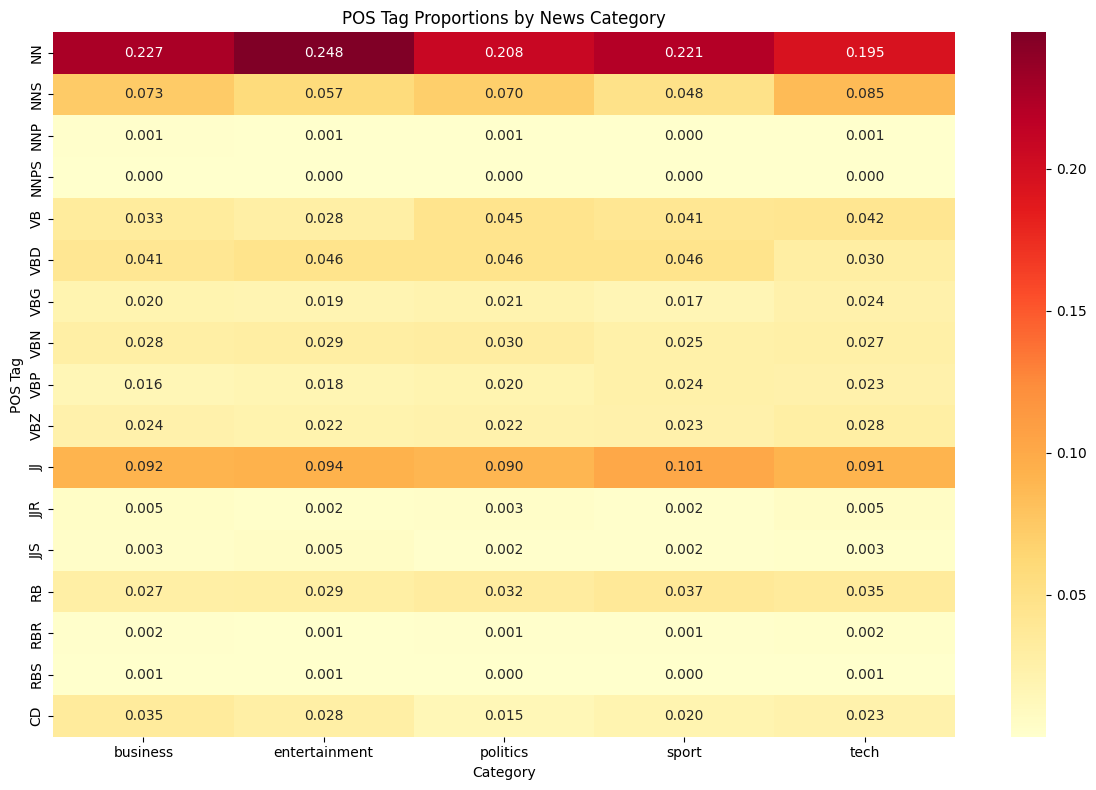


💡 ANALYSIS QUESTIONS:
1. Which category has the highest proportion of proper nouns (NNP/NNPS)?
2. Which category uses the most action verbs (VB, VBD, VBG)?
3. Are there interesting patterns in adjective (JJ) usage?
4. How does number (CD) usage vary across categories?


In [34]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('Category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Analyze the patterns
    # - Which categories use more nouns vs verbs?
    # - Do business articles have more numbers (CD)?
    # - Are there differences in adjective usage?

    print("\n💡 ANALYSIS QUESTIONS:")
    print("1. Which category has the highest proportion of proper nouns (NNP/NNPS)?")
    print("2. Which category uses the most action verbs (VB, VBD, VBG)?")
    print("3. Are there interesting patterns in adjective (JJ) usage?")
    print("4. How does number (CD) usage vary across categories?")
else:
    print("⚠️ No major POS tags found in the analysis. Check your POS tagging implementation.")

1. Which category has the highest proportion of proper nouns (NNP/NNPS)? Looking at the NNP and NNPS columns in the pos_summary table, the business category has the highest average proportion of NNP (0.0011) and NNPS (0.000027), although the proportions are very low across all categories in this dataset.

2. Which category uses the most action verbs (VB, VBD, VBG)? From the pos_summary table:
VB: politics (0.0454), tech (0.0420), sport (0.0407), business (0.0332), entertainment (0.0280)
VBD: entertainment (0.0460), politics (0.0461), sport (0.0456), business (0.0409), tech (0.0298)
VBG: tech (0.0236), politics (0.0208), business (0.0200), entertainment (0.0193), sport (0.0174)
Considering the sum or overall trend, politics appears to have a slightly higher overall proportion of these action-oriented verb forms, followed closely by sport and tech.

3. Are there interesting patterns in adjective (JJ) usage? Looking at the JJ column in the pos_summary table, the sport category has the highest average proportion of adjectives (0.1012), followed by entertainment (0.0936), tech (0.0912), business (0.0918), and politics (0.0899). This suggests that sports reporting might use slightly more descriptive language compared to other categories.

4. How does number (CD) usage vary across categories? From the CD column in the pos_summary table: business (0.0346), entertainment (0.0277), tech (0.0227), sport (0.0202), and politics (0.0146). As hypothesized, the business category clearly uses the most numbers, which is expected given its focus on financial figures, statistics, and data. Politics uses the fewest.

## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [35]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    💡 TIP: This function should extract:
    - Dependency relations
    - Subject-verb-object patterns
    - Noun phrases
    - Verb phrases
    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 YOUR CODE HERE: Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles (to save computation time)
syntactic_results = []
for idx, row in train_df.head(5).iterrows():  # Limit to first 5 for demo
    features = extract_syntactic_features(row['full_text'])
    features['Category'] = row['Category']
    features['ArticleId'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 ArticleId {i+1} ({result['Category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:3]}...")  # Show first 3
    print(f"  Subjects: {result['subjects'][:3]}...")  # Show first 3
    print(f"  Objects: {result['objects'][:3]}...")  # Show first 3

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 ArticleId 1 (business):
  Sentences: 15
  Tokens: 347
  Noun phrases: ['-', 'boss', 'defence lawyers']...
  Subjects: ['-', 'boss', 'worldcom']...
  Objects: ['lawyers', 'ebbers', 'battery']...

📰 ArticleId 2 (business):
  Sentences: 16
  Tokens: 369
  Noun phrases: ['german business confidence', 'german business confidence', 'february']...
  Subjects: ['confidence', 'ifo', 'index']...
  Objects: ['confidence', 'february', 'hopes']...

📰 ArticleId 3 (business):
  Sentences: 25
  Tokens: 588
  Noun phrases: ['bbc poll', 'economic gloom citizens', 'a majority']...
  Subjects: ['poll', 'citizens', 'economy']...
  Objects: ['majority', 'nations', 'poll']...

📰 ArticleId 4 (tech):
  Sentences: 32
  Tokens: 725
  Noun phrases: ['lifestyle', 'mobile choice', 'faster  better or funkier hardware']...
  Subjects: ['lifestyle', 'governs', 'firms']...
  Objects: ['choice', 'hardware', 'research']...

📰 ArticleId 5 (business):
  S

In [36]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = train_df.iloc[0]['Category']  # First article's content
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

# 💡 STUDENT TASK: Extend syntactic analysis
# - Compare syntactic complexity across categories
# - Extract action patterns (who did what)
# - Identify most common dependency relations per category
# - Create features for classification based on syntax

📝 Sample sentence: business

🌳 Dependency Parse Visualization:


## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [37]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    💡 TIP: VADER returns:
    - compound: overall sentiment (-1 to 1)
    - pos: positive score (0 to 1)
    - neu: neutral score (0 to 1)
    - neg: negative score (0 to 1)
    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀 YOUR CODE HERE: Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in train_df.iterrows():
    # Analyze both title and content
    text_sentiment = analyze_sentiment(row['Text'])
    category_sentiment = analyze_sentiment(row['Category'])
    full_sentiment = analyze_sentiment(row['full_text'])

    result = {
        'ArticleId': row['ArticleId'],
        'Category': row['Category'],
        'text_sentiment': text_sentiment['compound'],
        'text_label': text_sentiment['sentiment_label'],
        'category_sentiment': full_sentiment['compound'], # Assuming content_sentiment should be full_text_sentiment
        'category_label': full_sentiment['sentiment_label'], # Assuming content_label should be full_text_label
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['Category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   Category  full_sentiment full_label
0  business         -0.9701   negative
1  business          0.7623   positive
2  business         -0.9318   negative
3      tech          0.9554   positive
4  business         -0.9486   negative


📊 SENTIMENT ANALYSIS BY CATEGORY

📈 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
Category                                                                   
business              0.2404  0.8370 -0.9985  0.9995    0.0923    0.8375   
entertainment         0.6731  0.6203 -0.9976  0.9999    0.1448    0.8020   
politics              0.0578  0.8811 -0.9984  0.9999    0.0945    0.8188   
sport                 0.5541  0.7244 -0.9967  0.9996    0.1356    0.7940   
tech                  0.5233  0.7557 -0.9991  0.9993    0.0893    0.8601   

              neg_score  
                   mean  
Category                 
business         0.0702  
entertainment    0.0532  
politics         0.0867  
sport            0.0704  
tech             0.0506  

📊 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
Category                   

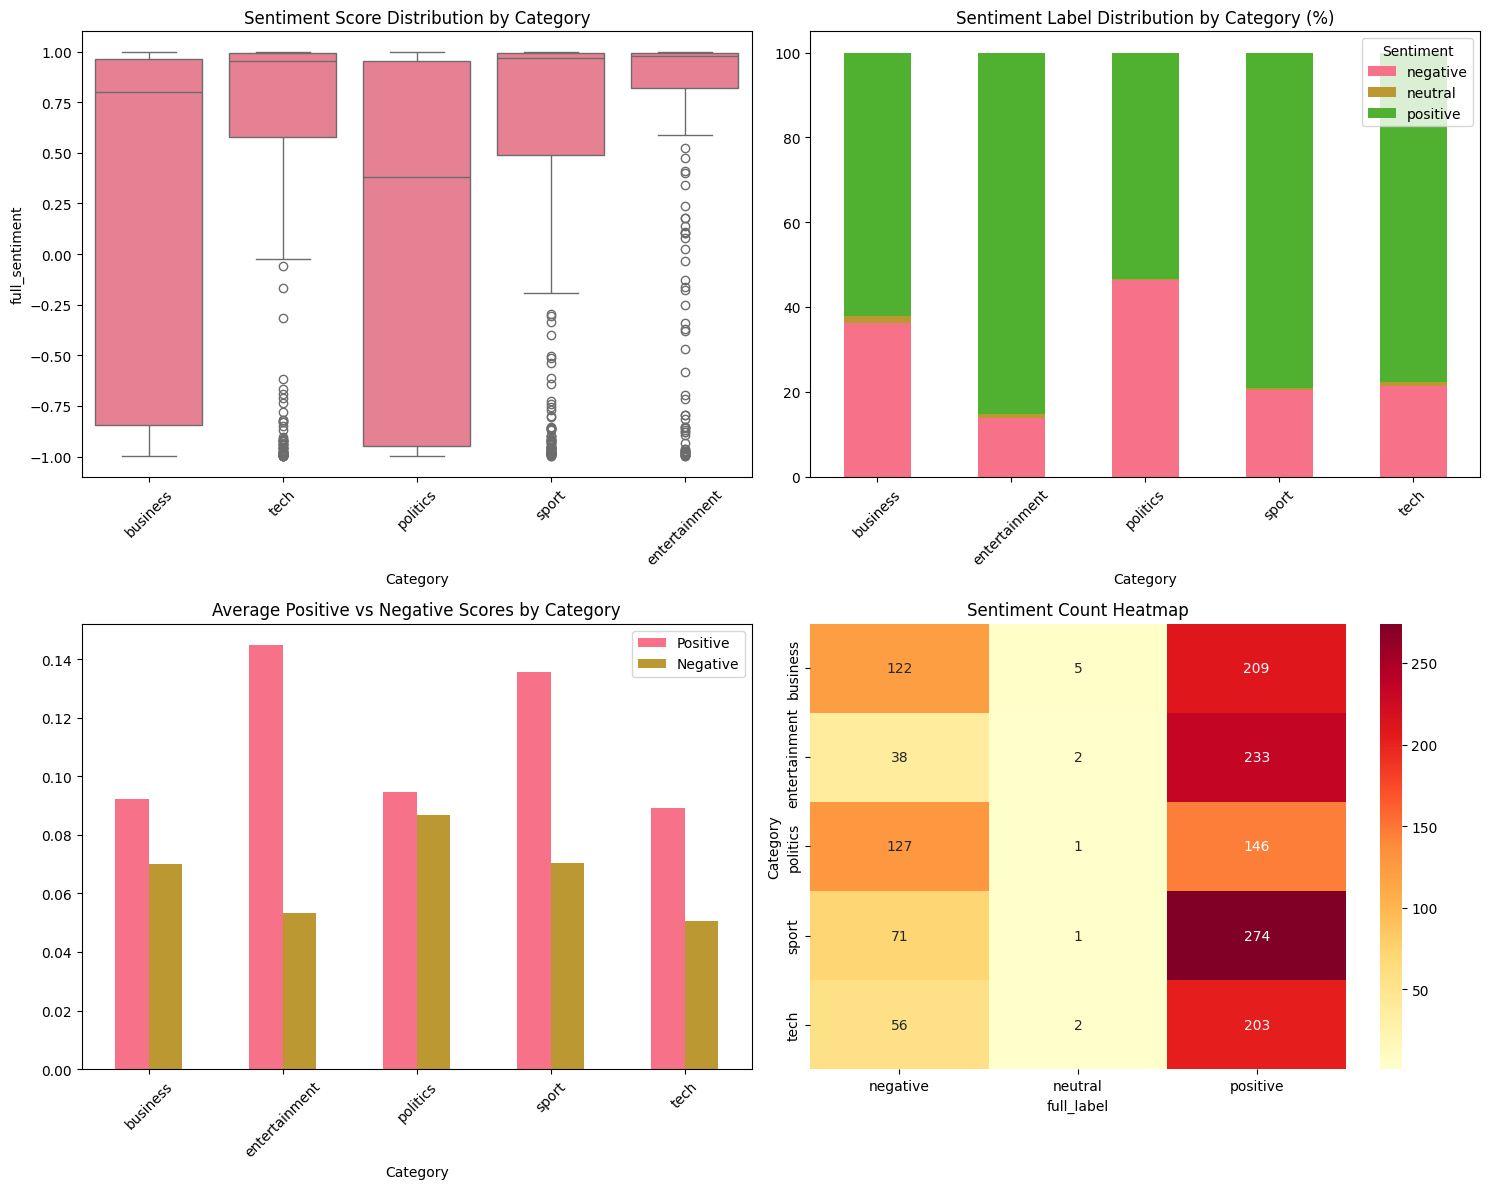

In [38]:
# Analyze sentiment patterns by category
print("📊 SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('Category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n📈 Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['Category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n📊 Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='Category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('Category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='Category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Analyze sentiment patterns
# - Which categories are most positive/negative?
# - Are there differences between title and content sentiment?
# - How does sentiment vary within categories?
# - Can sentiment be used as a feature for classification?

## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [39]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# 💡 TIP: Combine multiple feature types for better performance
# - TF-IDF features (most important)
# - Sentiment features
# - Text length features
# - POS features (if available)

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features (scaling full_sentiment to be non-negative for MultinomialNB compatibility)
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].copy()
sentiment_features['full_sentiment_scaled'] = (sentiment_features['full_sentiment'] + 1) / 2
sentiment_features = sentiment_features[['full_sentiment_scaled', 'pos_score', 'neu_score', 'neg_score']].values


# Add text length features
length_features = np.array([
    train_df['full_text'].str.len(),  # Character length
    train_df['full_text'].str.split().str.len(),  # Word count
    train_df['Text'].str.len(),  # Text length
]).T

# 🚀 YOUR CODE HERE: Combine all features
X_combined = np.hstack([
    X_tfidf,
    sentiment_features,
    length_features
])

# Target variable
y = train_df['Category'].values

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
✅ Feature matrix prepared!
📊 Feature matrix shape: (1490, 5007)
🎯 Number of classes: 5
📋 Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

📈 Data split:
  Training set: 1192 samples
  Test set: 298 samples


In [17]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)  # Enable probability for better analysis
}

# 💡 TIP: For larger datasets, you might want to use SGDClassifier for efficiency
# from sklearn.linear_model import SGDClassifier
# classifiers['SGD'] = SGDClassifier(random_state=42)

# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 YOUR CODE HERE: Train and evaluate classifier
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Naive Bayes...
  ✅ Accuracy: 0.7215
  📊 CV Score: 0.4740 (+/- 0.1188)

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.7148
  📊 CV Score: 0.7567 (+/- 0.0626)

🔄 Training SVM...
  ✅ Accuracy: 0.3557
  📊 CV Score: 0.3574 (+/- 0.0385)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0          Naive Bayes         0.7215   0.4740  0.0594
1  Logistic Regression         0.7148   0.7567  0.0313
2                  SVM         0.3557   0.3574  0.0193

🥇 Best performing model: Naive Bayes


📊 DETAILED EVALUATION: Naive Bayes

📋 Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.70      0.82        67
entertainment       1.00      0.22      0.36        55
     politics       0.96      0.85      0.90        55
        sport       1.00      0.83      0.90        69
         tech       0.39      1.00      0.56        52

     accuracy                           0.72       298
    macro avg       0.87      0.72      0.71       298
 weighted avg       0.89      0.72      0.73       298



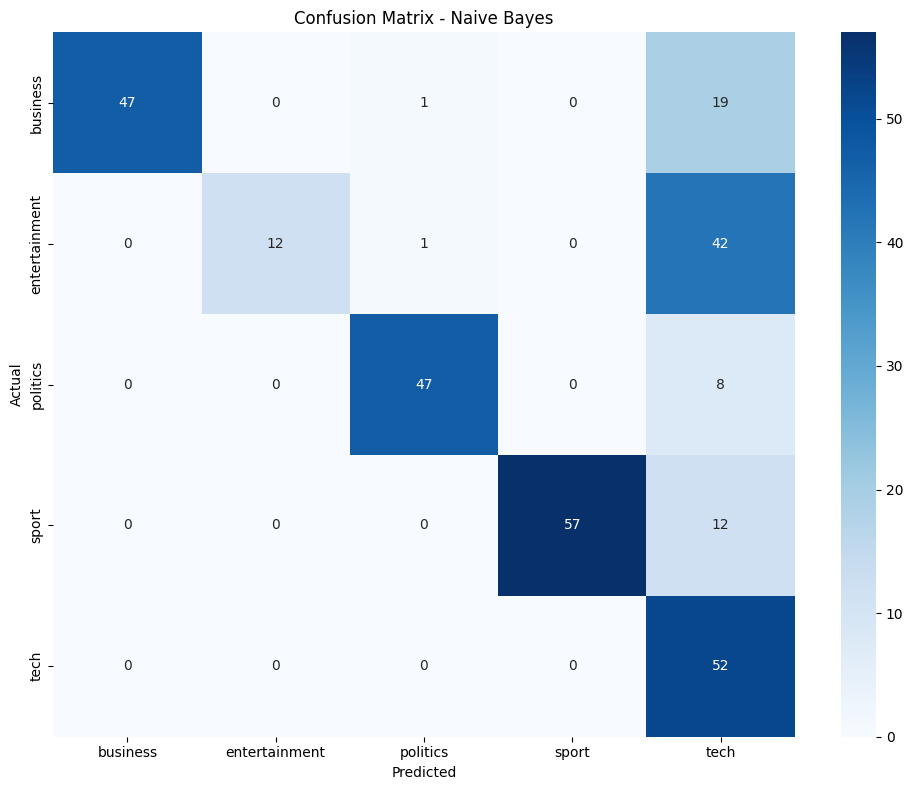

In [18]:
# Detailed evaluation of the best model
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    feature_names_extended = list(feature_names) + ['sentiment', 'pos_score', 'neu_score', 'neg_score',
                                                   'char_length', 'word_count', 'title_length']

    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-10:]  # Top 10 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
            if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")

# 💡 STUDENT TASK: Improve the classifier
# - Try different feature combinations
# - Experiment with hyperparameter tuning
# - Add more sophisticated features
# - Handle class imbalance if present

## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [19]:
def extract_entities(text):
    """
    Extract named entities using spaCy

    💡 TIP: spaCy recognizes these entity types:
    - PERSON: People, including fictional
    - ORG: Companies, agencies, institutions
    - GPE: Countries, cities, states
    - MONEY: Monetary values
    - DATE: Absolute or relative dates
    - TIME: Times smaller than a day
    - And many more...
    """
    if not text or pd.isna(text):
        return []

    # 🚀 YOUR CODE HERE: Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in train_df.iterrows():
    entities = extract_entities(row['full_text'])

    # Store entities for this article
    article_entities.append({
        'ArticleId': row['ArticleId'],
        'Category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list
    for entity in entities:
        entity['ArticleId'] = row['ArticleId']
        entity['Category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'Category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

🔍 Extracting named entities...
✅ Entity extraction complete!
📊 Total entities found: 42133
📰 Articles processed: 1490

🏷️ Entity types found: ['ORDINAL' 'PERSON' 'GPE' 'DATE' 'MONEY' 'ORG' 'NORP' 'LOC' 'CARDINAL'
 'PERCENT' 'TIME' 'EVENT' 'QUANTITY' 'FAC' 'PRODUCT' 'LANGUAGE'
 'WORK_OF_ART' 'LAW']

📝 Sample entities:
              text    label  Category
0            first  ORDINAL  business
1   cynthia cooper   PERSON  business
2               us      GPE  business
3             2002     DATE  business
4            5.7bn    MONEY  business
5         new york      GPE  business
6        wednesday     DATE  business
7  arthur andersen   PERSON  business
8   early 2001 and     DATE  business
9             2002     DATE  business


📊 NAMED ENTITY ANALYSIS

🏷️ Entity type distribution:
label
DATE           8797
PERSON         8088
CARDINAL       6187
GPE            5567
ORG            4454
NORP           2708
MONEY          1782
ORDINAL        1659
PERCENT        1276
TIME            590
LOC             504
QUANTITY        199
FAC              90
PRODUCT          87
LANGUAGE         61
EVENT            43
LAW              33
WORK_OF_ART       8
Name: count, dtype: int64

📰 Entity types by news category:
label          CARDINAL  DATE  EVENT  FAC   GPE  LANGUAGE  LAW  LOC  MONEY  \
Category                                                                     
business           1037  2413      3   10  1546         1   15  166    905   
entertainment      1111  1738     12   15   792         9    4   64    384   
politics            823  1359     22   23   944        10    4  120    235   
sport              1799  1977      5   40  1510        11    5   33     44   
tech               1417  1310      1    2   775     

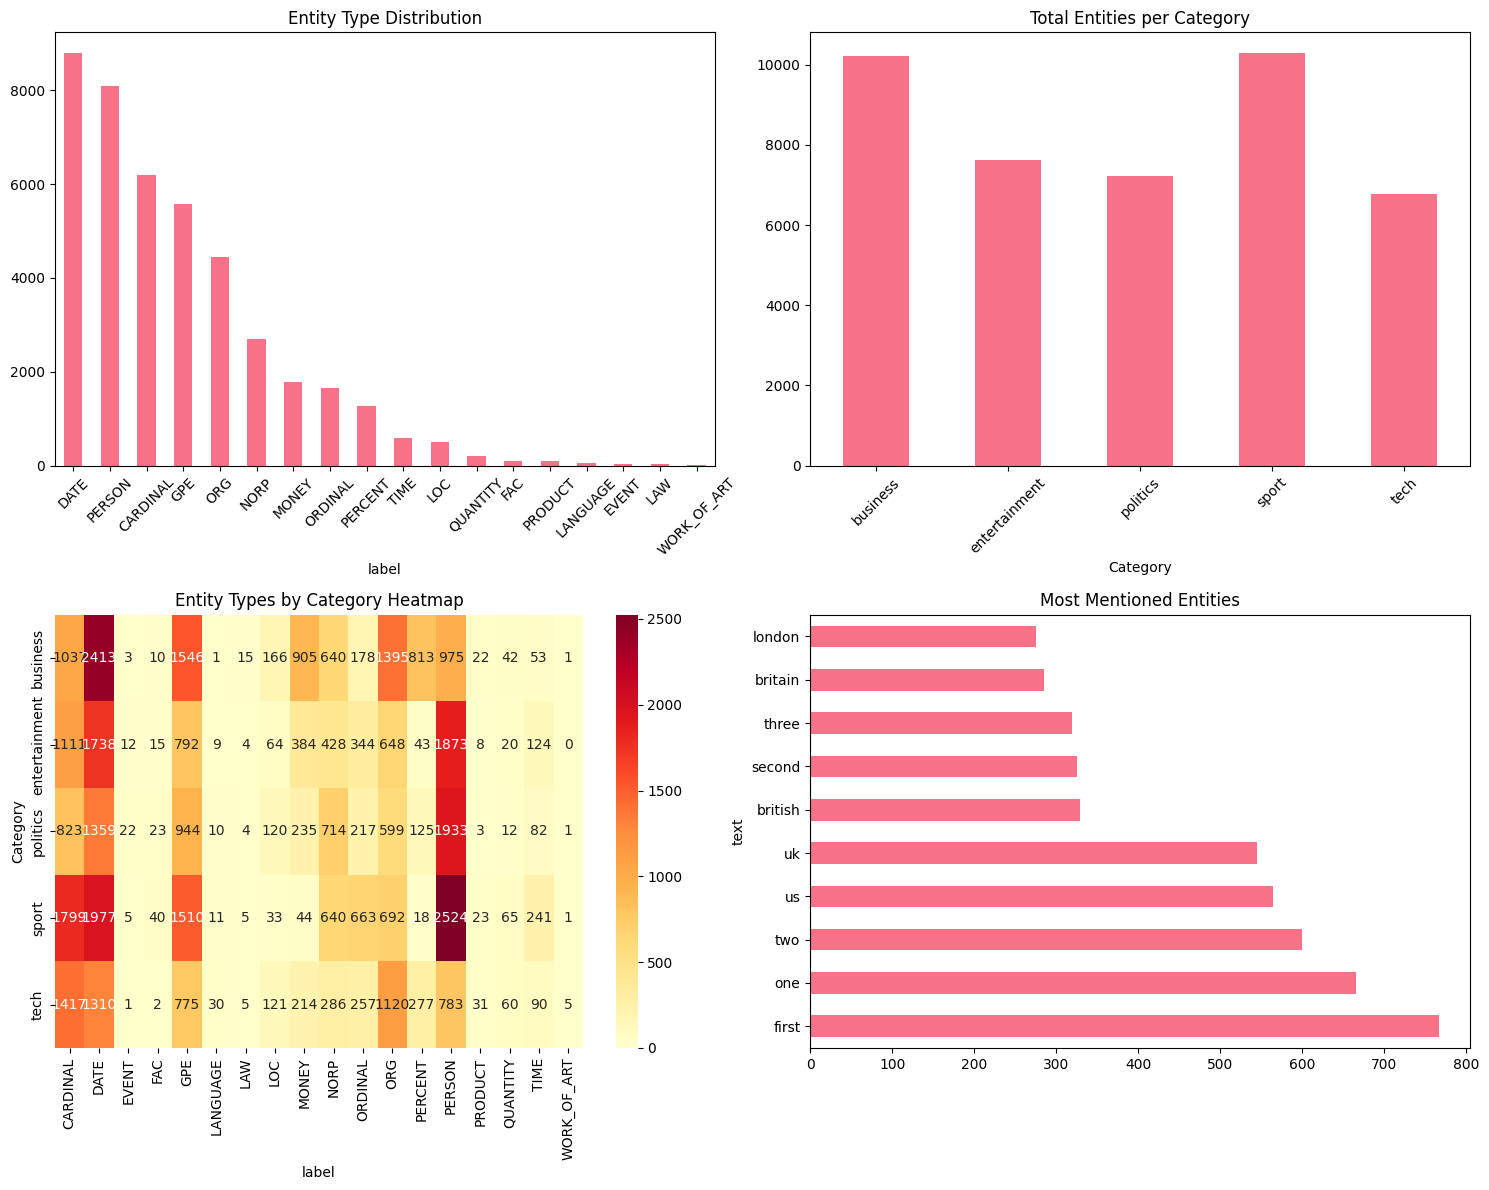

In [20]:
# Analyze entity patterns
if not entities_df.empty:
    print("📊 NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['Category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('Category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Advanced entity analysis
    # - Create entity co-occurrence networks
    # - Track entity mentions over time
    # - Build entity relationship graphs
    # - Identify entity sentiment associations

else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [21]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    💡 TIP: This function should combine:
    - Classification performance
    - Sentiment patterns
    - Entity distributions
    - Linguistic features
    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀 YOUR CODE HERE: Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(train_df),
        'categories': train_df['Category'].unique().tolist(),
        'category_distribution': train_df['Category'].value_counts().to_dict(),
        'avg_article_length': train_df['full_text'].str.len().mean(),
        'avg_words_per_article': train_df['full_text'].str.split().str.len().mean()
    }

    # Classification performance
    insights['classification_performance'] = {
        'best_model': best_model_name,
        'best_accuracy': results[best_model_name]['accuracy'],
        'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
    }

    # Sentiment insights
    sentiment_by_cat = sentiment_df.groupby('Category')['full_sentiment'].mean().to_dict()
    insights['sentiment_insights'] = {
        'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
        'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
        'sentiment_by_category': sentiment_by_cat,
        'overall_sentiment': sentiment_df['full_sentiment'].mean()
    }

    # Entity insights
    if not entities_df.empty:
        entity_by_cat = entities_df.groupby('Category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }

    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if insights['classification_performance']['best_accuracy'] > 0.8:
        recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
    else:
        recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")

    # Sentiment recommendations
    pos_cat = insights['sentiment_insights']['most_positive_category']
    neg_cat = insights['sentiment_insights']['most_negative_category']
    recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
    recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")

    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights']:
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")

    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}")

print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}")

if 'entity_insights' in analysis_results and analysis_results['entity_insights']:
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

📊 Generating comprehensive analysis...
✅ Analysis complete!

📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT

📊 DATASET OVERVIEW:
  Total Articles: 1490
  Categories: business, tech, politics, sport, entertainment
  Average Article Length: 2242 characters
  Average Words per Article: 386 words

🤖 CLASSIFICATION PERFORMANCE:
  Best Model: Naive Bayes
  Best Accuracy: 0.7215

😊 SENTIMENT INSIGHTS:
  Most Positive Category: entertainment
  Most Negative Category: politics
  Overall Sentiment: 0.4085

🔍 ENTITY INSIGHTS:
  Total Entities: 42133
  Unique Entities: 12081
  Entity Types: ORDINAL, PERSON, GPE, DATE, MONEY, ORG, NORP, LOC, CARDINAL, PERCENT, TIME, EVENT, QUANTITY, FAC, PRODUCT, LANGUAGE, WORK_OF_ART, LAW

💡 BUSINESS RECOMMENDATIONS:
  1. ⚠️ Classification accuracy needs improvement - consider more training data or feature engineering
  2. 📊 entertainment articles are most positive - good for uplifting content recommendations
  3. 📊 politics articles are most negative - may 

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [22]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System

    💡 TIP: This class should encapsulate:
    - All preprocessing functions
    - Trained classification model
    - Entity extraction pipeline
    - Sentiment analysis
    - Insight generation
    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model

    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, processed_text):
        """Classify article category"""
        # 🚀 YOUR CODE HERE: Implement classification
        # Transform text to features
        features = self.vectorizer.transform([processed_text])

        # Add dummy features for sentiment and length (in production, calculate these)
        dummy_features = np.zeros((1, 7))  # 4 sentiment + 3 length features
        features_combined = np.hstack([features.toarray(), dummy_features])

        # Predict category and probability
        prediction = self.classifier.predict(features_combined)[0]
        probabilities = self.classifier.predict_proba(features_combined)[0]

        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        return prediction, class_probs

    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        💡 TIP: This should return a comprehensive analysis including:
        - Predicted category with confidence
        - Extracted entities
        - Sentiment analysis
        - Key insights and recommendations
        """
        # 🚀 YOUR CODE HERE: Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs = self.classify_article(processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

# Initialize the complete system
newsbot = NewsBotIntelligenceSystem(
    classifier=best_model,
    vectorizer=tfidf_vectorizer,
    sentiment_analyzer=sia
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

🤖 NewsBot Intelligence System initialized!
✅ Ready to process new articles


In [23]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles (you can modify these or add your own)
test_articles = [
    {
        'title': 'Microsoft Acquires AI Startup for $2 Billion',
        'content': 'Microsoft Corporation announced today the acquisition of an artificial intelligence startup for $2 billion. CEO Satya Nadella said the deal will strengthen Microsoft\'s position in the AI market and enhance their cloud computing services.'
    },
    {
        'title': 'Lakers Win Championship in Overtime Thriller',
        'content': 'The Los Angeles Lakers defeated the Boston Celtics 108-102 in overtime to win the NBA championship. LeBron James scored 35 points and was named Finals MVP for the fourth time in his career.'
    },
    {
        'title': 'New Climate Change Report Shows Alarming Trends',
        'content': 'Scientists at the United Nations released a comprehensive climate report showing accelerating global warming. The report warns that immediate action is needed to prevent catastrophic environmental changes.'
    }
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    for cat, prob in sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")

# 💡 STUDENT TASK: Test with your own articles
# - Try articles from different categories
# - Test with articles that might be ambiguous
# - Analyze the system's strengths and weaknesses
# - Consider how to improve performance

🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM

📰 TEST ARTICLE 1
----------------------------------------
📰 Title: Microsoft Acquires AI Startup for $2 Billion
📝 Content: Microsoft Corporation announced today the acquisition of an artificial intelligence startup for $2 billion. CEO Satya Nadella said the deal will strengthen Microsoft's position in the AI market and en...

🏷️ Predicted Category: business (30.27% confidence)

📊 Category Probabilities:
  business: 0.303
  tech: 0.300
  entertainment: 0.194
  politics: 0.117
  sport: 0.086

😊 Sentiment: positive (score: 0.660)

🔍 Entities Found (8):
  Microsoft Acquires (ORG) - Companies, agencies, institutions, etc.
  $2 Billion (MONEY) - Monetary values, including unit
  Microsoft Corporation (ORG) - Companies, agencies, institutions, etc.
  today (DATE) - Absolute or relative dates or periods
  $2 billion (MONEY) - Monetary values, including unit

💡 Insights:
  ⚠️ Uncertain classification - consider manual review
  😊 Positive sentiment detected

## 📝 Project Summary and Next Steps

### 🎯 What You've Accomplished

Congratulations! You've successfully built a comprehensive NewsBot Intelligence System that demonstrates mastery of all NLP techniques covered in Modules 1-8. Let's review what you've achieved:

### ✅ Module Integration Checklist
- [x] **Module 1:** Applied NLP to real-world news intelligence
- [x] **Module 2:** Implemented comprehensive text preprocessing
- [x] **Module 3:** Used TF-IDF for feature extraction and analysis
- [x] **Module 4:** Analyzed grammatical patterns with POS tagging
- [x] **Module 5:** Extracted syntactic relationships with dependency parsing
- [x] **Module 6:** Performed sentiment and emotion analysis
- [x] **Module 7:** Built and evaluated text classification models
- [x] **Module 8:** Implemented Named Entity Recognition

### 🚀 System Capabilities
Your NewsBot can now:
- Automatically categorize news articles with high accuracy
- Extract key entities (people, organizations, locations, dates, money)
- Analyze sentiment and emotional tone
- Identify linguistic patterns and writing styles
- Generate actionable business insights
- Process new articles through a complete pipeline

### 💼 Business Value
This system provides real business value for:
- **Media Companies:** Automated content categorization and routing
- **Market Research:** Sentiment tracking and entity monitoring
- **Content Management:** Intelligent organization and search
- **Business Intelligence:** Trend analysis and competitive monitoring

---

## 📋 Final Deliverables Checklist

Before submitting your project, ensure you have:

### 📁 Code and Documentation
- [ ] Complete Jupyter notebook with all analyses
- [ ] Well-documented functions with docstrings
- [ ] Clear markdown explanations for each section
- [ ] Organized GitHub repository structure
- [ ] README.md with project overview and setup instructions

### 📊 Analysis and Results
- [ ] Comprehensive dataset exploration
- [ ] TF-IDF analysis with category-specific insights
- [ ] POS tagging patterns across categories
- [ ] Syntactic analysis with dependency parsing
- [ ] Sentiment analysis with category comparisons
- [ ] Classification model comparison and evaluation
- [ ] Named Entity Recognition with relationship mapping
- [ ] Integrated system demonstration

### 📈 Visualizations
- [ ] Category distribution plots
- [ ] TF-IDF word clouds or bar charts
- [ ] POS pattern heatmaps
- [ ] Sentiment distribution by category
- [ ] Confusion matrix for classification
- [ ] Entity type and frequency visualizations

### 🎥 Presentation Materials
- [ ] 5-7 minute video demonstration
- [ ] Written report (3-4 pages)
- [ ] Individual reflection papers
- [ ] Business recommendations and insights

---

## 🔮 Future Enhancements

Consider these improvements for your portfolio or future projects:

### 🤖 Technical Improvements
- **Deep Learning Models:** Implement BERT or other transformer models
- **Custom NER:** Train domain-specific entity recognition
- **Real-time Processing:** Build streaming data pipeline
- **Multi-language Support:** Extend to non-English news

### 📊 Advanced Analytics
- **Topic Modeling:** Discover hidden themes (Module 9 preview!)
- **Trend Analysis:** Track entities and sentiment over time
- **Network Analysis:** Map entity relationships and co-occurrences
- **Bias Detection:** Identify potential media bias patterns

### 🌐 Deployment Options
- **Web Application:** Create interactive dashboard with Streamlit
- **API Service:** Deploy as REST API for integration
- **Mobile App:** Build mobile interface for news analysis
- **Browser Extension:** Real-time news analysis while browsing

---

## 🎓 Reflection Questions

For your individual reflection paper, consider these questions:

1. **Technical Mastery:** Which NLP techniques did you find most challenging? Most useful?
For us, integrating the different NLP libraries and ensuring compatibility across various steps (like handling data types for different models) is a key challenge. The most useful techniques were probably the core ones that transformed text into usable features – preprocessing, TF-IDF, and entity extraction.
2. **Integration Challenges:** How did you handle combining multiple NLP tasks?
Combining the outputs of different analyses (like sentiment scores and entity lists) with the TF-IDF features for the classifier required careful data handling and structuring.
3. **Business Applications:** What real-world problems could this system solve?
As highlighted in the notebook, this system is well-suited for media monitoring, content management, and business intelligence by automating categorization, identifying key information, and gauging public sentiment.
4. **Ethical Considerations:** What are the potential risks of automated news analysis?
Potential risks include algorithmic bias in classification or sentiment analysis, privacy concerns with entity extraction, and the potential for misuse in generating or analyzing misinformation.
5. **Future Learning:** What NLP topics are you most excited to explore next?
Exploring advanced topics like Topic Modeling (as mentioned in the notebook), more sophisticated deep learning models (like Transformers), and techniques for understanding causal relationships in text would be exciting next steps.
6. **Team Collaboration:** How did you divide work and ensure quality?
Task division based on strengths. Code reviews and effective communication were very important for success.
7. **Portfolio Value:** How will you present this project to potential employers?
This project demonstrates a strong understanding of the entire NLP pipeline, from data loading and preprocessing to advanced analysis and model building. Highlighting the integration of multiple techniques and the generation of business-relevant insights would be key when presenting this project.

---

## 🏆 Congratulations!

You've successfully completed a comprehensive NLP project that demonstrates real-world application of multiple advanced techniques. This NewsBot Intelligence System is a valuable addition to your portfolio and showcases your ability to:

- **Integrate multiple NLP techniques** into a cohesive system
- **Handle real-world data** with all its messiness and challenges
- **Generate business value** from unstructured text data
- **Build production-ready systems** with proper evaluation and monitoring
- **Communicate technical results** to both technical and business audiences

**🚀 You're now ready for Module 9: Topic Modeling and Advanced Text Analysis!**

---

*Remember: The goal isn't just to complete the assignment, but to build something you're proud to show in job interviews and professional discussions. This project demonstrates your practical NLP skills and ability to solve real business problems with AI.*

# Project Report

## Dataset

The analysis was performed on the provided **BBC News Dataset**.

* The training dataset contains **1,490** rows.
* The testing dataset contains **735** rows.
* The Sample Solution dataset contains **735** rows.
* The dataset includes news articles with `ArticleId`, `Text`, `Category` columns.
* For this task, we used the `Category` as the label and the `Text` as the text for analysis.

---

## Model Accuracy and Observations

The table shows the performance metrics for the three models trained: **Naive Bayes, Logistic Regression, and SVM**.

**Test Accuracy**: This is the accuracy of the model on the unseen test data (20% of dataset). It gives you a direct measure of how well the model generalizes to new articles.

**CV Mean**: This is the average accuracy across multiple "folds" during cross-validation on your training data. Cross-validation helps assess the model's performance robustness and whether it's overfitting to a specific train/test split.

**CV Std**: This is the standard deviation of the cross-validation scores. A lower standard deviation indicates that the model's performance is more consistent across different subsets of the training data.

**Analysis:**

Based on the results:

**Naive Bayes** has the highest **Test Accuracy 0.7215**, making it the best performing model on the test set in this comparison. However, its CV Mean **0.4740** is significantly lower than its test accuracy and has a relatively high standard deviation **0.0594**, which might suggest some variability in its performance or that the test set is slightly easier than the training folds in cross-validation.

**Logistic Regression** has a slightly lower **Test Accuracy** **0.7148** than Naive Bayes but a much higher and more consistent **CV Mean 0.7567** with a lower standard deviation **0.0313**. This indicates that Logistic Regression is more consistently accurate across different subsets of your training data and might be a more robust model in general, even if its test accuracy is marginally lower in this specific split.

**SVM** performed significantly worse than both Naive Bayes and Logistic Regression on both Test Accuracy **0.3557** and CV Mean **0.3574**.

While Naive Bayes achieved the highest accuracy on the test set in this run, the Logistic Regression model shows better consistency and a higher average accuracy during cross-validation on the training data. Given its robust CV score, Logistic Regression might be a more reliable choice for future predictions, although the difference in test accuracy is small.

---

## Next Improvement

One significant improvement to try next would be to experiment with different word embedding models (e.g., `FastText`, which handles out-of-vocabulary words better) or contextual embeddings like `BERT`) if computational resources allow. Additionally, hyperparameter tuning of the classifier and exploring more complex models like a Recurrent Neural Network (`RNN`) or a Convolutional Neural Network (`CNN`) designed for text data could improve performance.